# PDAML Project 3: Parameter Estimation

# Part 1

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from iminuit import Minuit
from scipy.integrate import quad


In [2]:
#IMPLEMEND DISS CLASSES LATER
#class fits:

    #Construct everything thats needed
#    def __init__(self, m, V, tau, imax):
#        self.m = m
#        self.V = V
#        self.tau = tau
#        self.t_max = t_max
#        self.theta
#        self.imax = imax

In [259]:
def PDF(t):
    return ((1 + v * np.sin(m*t))*np.exp(-t/tau))

def function():
    A = quad(lambda t: PDF(t), 0, 10)
    A = A[0]
    return A
    
norm = function()

def PDF_norm(t):
    return ((1 + v * np.sin(m*t))*np.exp(-t/tau)/norm)

#use quad to norm * 1/tau

In [260]:
def MC(tmin,tmax,imax):#,vmin,vmax):
    ymax = 1.1
    times_array = []
    #estim_v_array = []
    
    t = [np.random.uniform(tmin,tmax) for _ in range(imax)]
    #estim_v = [np.random.uniform(vmin,vmax) for _ in range(imax)]
    
    y1 = np.zeros(imax)
    y2 = np.zeros(imax)
    for i in range(imax):
        y1[i] = PDF_norm(t[i])
        y2[i] = ymax*np.random.uniform()

    i = 0
    j = 0
    while i < (imax):
        while j < (imax):
            if (y2[i]<y1[j]):
                #print(i,j)
                times_array.append(t[i])
                #estim_v_array.append(estim_v[i])
                i = i + 1
                j = j + 1
            
            else:
                t[i] = np.random.uniform(tmin, tmax)
                #estim_v[i] = np.random.uniform(vmin,vmax)
                y1[i] = PDF_norm(t[i])
                y2[i] = ymax*np.random.uniform()
                i = i
                j = j
    
    return times_array#, estim_v_array
    

In [261]:
tmin  = 0
tmax = 10
imax = 100000

tau = 1.5
v = 0.1
m = 20.


times_array = MC(tmin,tmax,imax)

#Estimated tau = average of decay time
print(np.mean(times_array))
print(np.std(times_array))
min(times_array)

1.4721236959919612
1.4458840821743413


1.808841988415466e-05

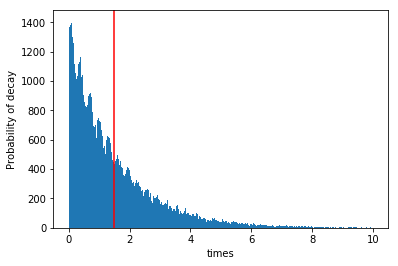

In [262]:
plt.hist(times_array[:], bins = 500)
plt.axvline(x=tau, color='r', label='Actual decay time')
plt.xlabel("times")
plt.ylabel('Probability of decay')
plt.show()

In [234]:
def PDF_to_min(t, tau, v, m):
    return ((1. + v * np.sin(m*t))*np.exp(-t/tau))

def minimization_error(times_array, initial_guess):
    
    def NLL_1(params):
        tau, v, m = params
        joint_array = []
        joint_likelihood = []
        
        i = 0
        for i in range (len(times_array)):
            joint_1 = (PDF_to_min(times_array[i], tau, v, m))
            joint_array.append(joint_1)
        
        new_array = np.clip(joint_array, 0.001, 5)
        
        i = 0
        joint_likelihood = -math.log(new_array)
        NLL = np.sum(joint_likelihood)
        return NLL
    
    bounds = [(0, 100.), (0, 0.9), (0, 100.)]

    
    minimizer = minimize(NLL_1, initial_guess, method='L-BFGS-B', bounds=bounds, tol=1e-10)
    min_NLL = minimizer.fun
    min_params = minimizer.x
    #tau1_min = min_params[0]
    #tau2_min = min_params[1]
    #F_min = min_params[2]
    print('\n The minimum value of NLL is: ' +str(min_NLL))
    print('\n At the minumum NLL the estimated parameters tau1, tau2 and F are: \n' +str(min_params))


In [236]:
def minimization_error(times_array, initial_guess):
    
    def NLL_1(params):
        tau, v, m = params
        joint_1 = (PDF_to_min(np.array(times_array), tau, v, m))
        joint_2 = np.clip(joint_1, 0.0000001, np.inf)
        joint_likelihood = -np.log(joint_2)
        NLL = np.sum(joint_likelihood)
        return NLL
    
    bounds = [(1., 2.), (0, 0.99), (10, 30.)]

    
    minimizer = minimize(NLL_1, initial_guess, bounds=bounds)
    min_NLL = minimizer.fun
    min_params = minimizer.x
    #tau1_min = min_params[0]
    #tau2_min = min_params[1]
    #F_min = min_params[2]
    print('\n The minimum value of NLL is: ' +str(min_NLL))
    print('\n At the minumum NLL the estimated parameters tau, v, m are: \n' +str(min_params))

        

In [237]:
#REPEAT 10 times and look for distribution
initial_guess = [1.5, 0.1, 20.]
minimization_error(times_array, initial_guess)


 The minimum value of NLL is: 74059.89554960125

 At the minumum NLL the estimated parameters tau, v, m are: 
[ 2.          0.16796228 20.00201667]


params = [1.5, 0.1, 20.]
def NLL_1(params):
    v, m, tau = params
    joint_1 = (PDF_to_min(np.array(times_array), v, m, tau))
    joint_2 = np.clip(joint_1, 0.0000001, 5)
    joint_likelihood = -np.log(joint_2)
    NLL = np.sum(joint_likelihood)
    return NLL


# Create Minuit instance with desired minimisation objective, initial parameter values, etc.
m = Minuit(NLL_1, tau = 1.5, v = 0.1 , m = 20, tau_err = 5., v_err = 0.1, m_err = 10.)

# Perform fit
m.migrad()

# Estimate/refine error matrix
m.hesse()   

# Get best-fit parameter values
params = m.values.values()

# Part 2

In [163]:
#PASS THROUGH MINIMISER AGAIN
def time_bias(f):
    sigma = f* tau
    t_measured = np.random.normal(np.array(times_array), sigma)
    
    print(np.mean(t_measured))

    
    plt.hist(t_measured[:], bins = 500)
    plt.xlabel("times")
    plt.ylabel('Probability of decay')
    plt.show()
    return t_measured

1.3095775309377042


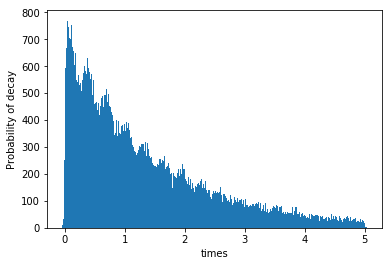

[0.39242309 1.15168765 0.39164898 ... 4.83441641 3.05795931 2.71461433]


In [189]:
t_measured = time_bias(0.01)
print(t_measured)

In [166]:
#Try and fit these new T measured values to try and determine the params.

In [167]:
initial_guess = [1.5, 0.1, 20.]
minimization_error(t_measured, initial_guess)


 The minimum value of NLL is: 65281.93673549822

 At the minumum NLL the estimated parameters tau, v, m are: 
[ 2.          0.08832894 16.86657212]


# Part 3

In [252]:
#PASS THROUGH BOX METHOD


def a(s, t):
    return (1.+s*PDF_norm(t))

    


In [256]:
def MC(tmin,tmax,imax):#,vmin,vmax):
    ymax = 1.1
    times_array = []
    #estim_v_array = []
    
    t = [np.random.uniform(tmin,tmax) for _ in range(imax)]
    #estim_v = [np.random.uniform(vmin,vmax) for _ in range(imax)]
    
    y1 = np.zeros(imax)
    y2 = np.zeros(imax)
    for i in range(imax):
        y1[i] = a(0.3, t[i])
        y2[i] = ymax*np.random.uniform()

    i = 0
    j = 0
    while i < (imax):
        while j < (imax):
            if (y2[i]<y1[j]):
                #print(i,j)
                times_array.append(t[i])
                #estim_v_array.append(estim_v[i])
                i = i + 1
                j = j + 1
            
            else:
                t[i] = np.random.uniform(tmin, tmax)
                #estim_v[i] = np.random.uniform(vmin,vmax)
                y1[i] = a(0.3,t[i])
                y2[i] = ymax*np.random.uniform()
                i = i
                j = j
    
    return times_array#, estim_v_array
    

In [257]:
times_array = MC(tmin,tmax,imax)


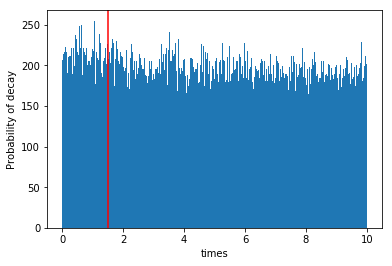

In [258]:
plt.hist(times_array[:], bins = 500)
plt.axvline(x=tau, color='r', label='Actual decay time')
plt.xlabel("times")
plt.ylabel('Probability of decay')
plt.show()